In [1]:
import warnings
warnings.filterwarnings("ignore")
from api import API

Using TensorFlow backend.


In [2]:
redd = {
  'power': {
    'mains': ['apparent','active'],
    'appliance': ['apparent','active']
  },
  'sample_rate': 60,
  'artificial_aggregate':True,
  'appliances': ['fridge','air conditioner','electric furnace','washing machine'],
  'methods': {

      'Mean': {},"CO":{},'Hart85':{},"FHMM_EXACT":{},
      "RNN":{'n_epochs':50,'batch_size':1024},"Seq2Point":{'n_epochs':50,'batch_size':1024},
      "Seq2Seq":{'n_epochs':50,'batch_size':1024},"DAE":{'n_epochs':50,'batch_size':1024},"WindowGRU":{'n_epochs':30,'batch_size':1024},

  },
   'train': {    
    'datasets': {
            'Dataport': {
                'path': '../dataport.hdf5',
				'buildings': {

				10: {
					'start_time': '2015-04-04',
					'end_time': '2015-04-24'
				},
				15: {
					'start_time': '2015-04-30',
					'end_time': '2015-05-20'
				}
				}
				                
			}
			}
	},
	'test': {
	'datasets': {
		'Datport': {
			'path': '../dataport.hdf5',
			'buildings': {
                
				10: {
					'start_time': '2015-04-25',
					'end_time': '2015-05-01'
					},
				15: {
					'start_time': '2015-05-20',
					'end_time': '2015-05-27'
					}
			}
	}
},
        'metrics':['mae']
}
}

Joint Testing for all algorithms
Loading data for  Datport  dataset
Dropping missing values
Creating an Artificial Aggregate
Started Prediction using:  Mean
Started Prediction using:  CO
...............CO disaggregate_chunk running.............
Started Prediction using:  Hart85ing machine''
Finding Edges, please wait ...
Edge detection complete.
Creating transition frame ...
Transition frame created.
Creating states frame ...
States frame created.
Finished.
Started Prediction using:  FHMM
Started Prediction using:  RNN
Started Prediction using:  Seq2Point
Started Prediction using:  Seq2Seq
 test New mains shape
(8848, 99, 1)
Started Prediction using:  DAE
Started Prediction using:  WindowGRU
............  mae  ..............
                        Mean         CO      Hart85  FHMM_EXACT        RNN  \
fridge             48.931244  22.024817    9.255869   15.815448  12.090690   
air conditioner   217.217117  22.823944  155.204224   27.830650  23.262798   
electric furnace   70.432358  2

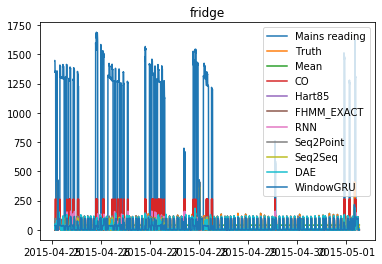

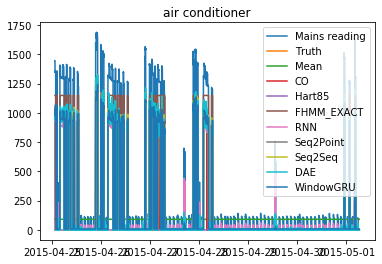

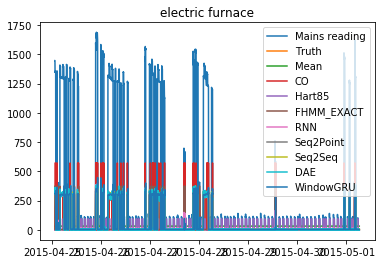

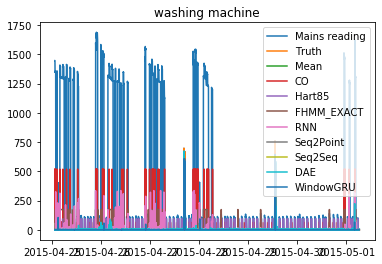

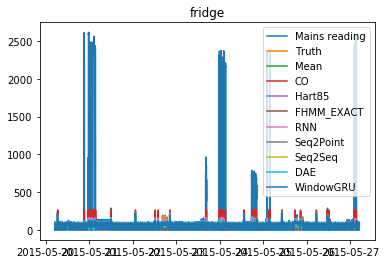

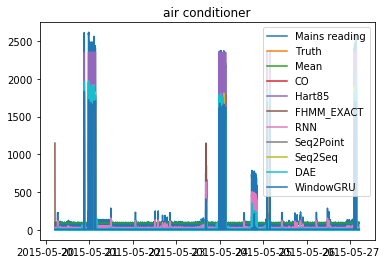

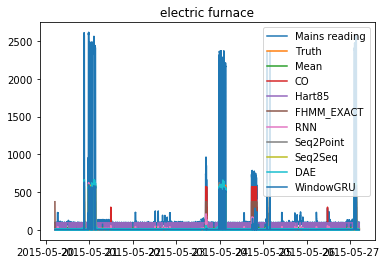

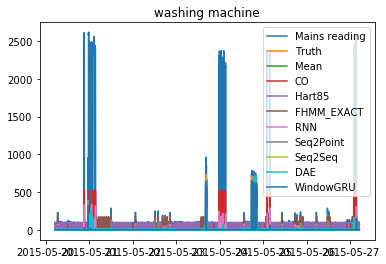

In [3]:

api_res = API(redd)


In [6]:
api_res.errors

[                        Mean         CO      Hart85  FHMM_EXACT        RNN  \
 fridge             48.931244  22.024817    9.255869   15.815448  12.090690   
 air conditioner   217.217117  22.823944  155.204224   27.830650  23.262798   
 electric furnace   70.432358  24.868210   66.506035   50.480328   8.119423   
 washing machine     7.248257  23.362955   31.604292   18.582607   7.487230   
 
                   Seq2Point    Seq2Seq        DAE  WindowGRU  
 fridge             4.934458   8.661490  14.059754  11.176711  
 air conditioner   10.690427  11.856860  12.477967  12.784633  
 electric furnace   4.978636   5.873093   5.696489   5.458029  
 washing machine    1.474327   2.049591   3.408093   1.560483  ,
                         Mean         CO     Hart85  FHMM_EXACT        RNN  \
 fridge             39.046425  15.836210  22.162104   12.326984  11.591303   
 air conditioner   135.736282   7.521528  24.382242   21.231747  23.940762   
 electric furnace   42.080956  18.970436  67.748

In [7]:
import numpy as np
import pandas as pd

vals = np.concatenate([np.expand_dims(df.values,axis=2) for df in api_res.errors],axis=2)


cols = api_res.errors[0].columns
indexes = api_res.errors[0].index


mean = np.mean(vals,axis=2)
std = np.std(vals,axis=2)
print ('\n\n')
print ("Mean")
print (pd.DataFrame(mean,index=indexes,columns=cols))
print ('\n\n')
print ("Standard Deviation")
print (pd.DataFrame(std,index=indexes,columns=cols))




Mean
                        Mean         CO     Hart85  FHMM_EXACT        RNN  \
fridge             43.988834  18.930513  15.708986   14.071216  11.840996   
air conditioner   176.476700  15.172736  89.793233   24.531199  23.601780   
electric furnace   56.256657  21.919323  67.127174   32.388081   8.624182   
washing machine    11.189517  22.793631  44.971393   17.813725   8.149079   

                  Seq2Point   Seq2Seq        DAE  WindowGRU  
fridge             6.061792  9.247132  13.525273   9.065100  
air conditioner    9.297880  9.211913  10.641324  10.375876  
electric furnace   3.203437  5.097389   4.767596   4.659510  
washing machine    4.086941  4.899256   6.337673   4.081780  



Standard Deviation
                       Mean        CO     Hart85  FHMM_EXACT       RNN  \
fridge             4.942410  3.094303   6.453117    1.744232  0.249693   
air conditioner   40.740417  7.651208  65.410991    3.299452  0.338982   
electric furnace  14.175701  2.948887   0.621140   1